# Data Wrangling & EDA

## 1 Content

TODO

## Import Libraries & Load Data
TODO: formatting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

After loading the data, we will check if the data looks okay. There should be no missing values, and the dataframes should be populated by reasonable values.

In [2]:
train_df = pd.read_csv("../data/raw/train.csv")
print("Train shape: ", train_df.shape)
test_df = pd.read_csv("../data/raw/test.csv")
print("Test shape: ", test_df.shape)

Train shape:  (20972, 9)
Test shape:  (8989, 3)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [4]:
train_df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [5]:
train_df['ID'].is_unique & train_df['TITLE'].is_unique & train_df['ABSTRACT'].is_unique

True

The numeric columns make sense; most importantly, the topic columns contain only 0 and 1.

In [6]:
train_df.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
for c in train_df.columns[3:]:
    print(train_df[c].value_counts())

0    12378
1     8594
Name: Computer Science, dtype: int64
0    14959
1     6013
Name: Physics, dtype: int64
0    15354
1     5618
Name: Mathematics, dtype: int64
0    15766
1     5206
Name: Statistics, dtype: int64
0    20385
1      587
Name: Quantitative Biology, dtype: int64
0    20723
1      249
Name: Quantitative Finance, dtype: int64


We saw earlier that the `shape` attribute of the `test_df` was different from the `train_df` in that it had six fewer columns, so "test.csv" likely does not have labels. The information provided from the `test_df` can still be used, so we will give its data a cursory check as well.

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8989 entries, 0 to 8988
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        8989 non-null   int64 
 1   TITLE     8989 non-null   object
 2   ABSTRACT  8989 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.8+ KB


In [9]:
test_df.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [10]:
test_df['ID'].is_unique & test_df['TITLE'].is_unique & test_df['ABSTRACT'].is_unique

True

Let's check the label distributions.

8594 articles tagged with Computer Science
6013 articles tagged with Physics
5618 articles tagged with Mathematics
5206 articles tagged with Statistics
587 articles tagged with Quantitative Biology
249 articles tagged with Quantitative Finance


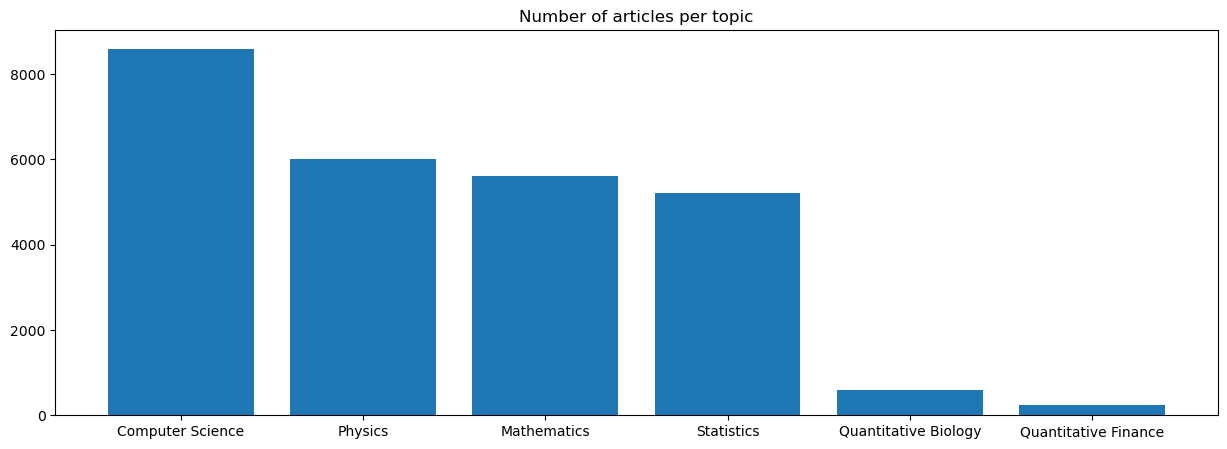

In [11]:
labels = train_df.columns[3:]
label_count = []
for label in labels:
    label_sum = train_df[label].sum()
    label_count.append(label_sum)
    print("{} articles tagged with {}".format(label_sum, label))

_ = plt.figure(figsize=(15,5))
_ = plt.title("Number of articles per topic")
_ = plt.bar(labels, label_count)

The classes are imbalanced, with 'Quantitative Biology' and 'Quantitative Finance' having relatively few articles tagged with those topics. Meanwhile, a lot of articles were marked with 'Computer Science'.

The articles could be labeled with more than one topic, so we will also check how these multi-topic articles are distributed.

In [12]:
print("Number of total tags: {}".format(np.sum(label_count)))

Number of total tags: 26267


There are 5,295 more labels than there are articles, so about 25% of the labels were given to articles that already have at least one label.

In [13]:
num_nlabels = train_df.iloc[:,3:].aggregate(np.sum, axis=1).value_counts()
print("Number of articles with n labels:")
print(num_nlabels)

Number of articles with n labels:
1    15928
2     4793
3      251
dtype: int64


A little over 1% of articles are marked with three topics, about 23% are marked with two topics, and the remaining 76% have only one topic.

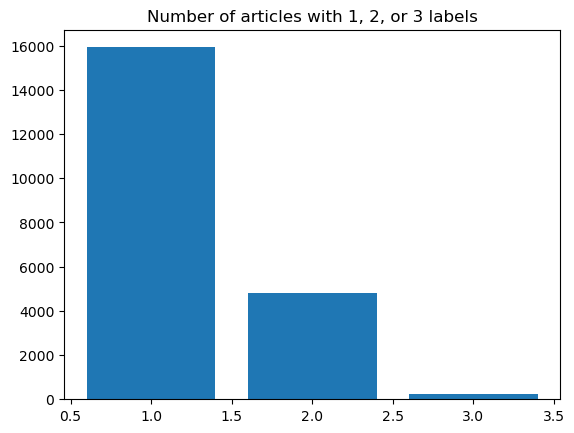

In [14]:
_ = plt.title("Number of articles with 1, 2, or 3 labels")
_ = plt.bar(num_nlabels.index, num_nlabels.values)

## Cleaning and Preprocessing the Text
TODO: formatting

The method, [`gensim.utils.simple_preprocess(doc,deacc=False,min_len=2,max_len=15)`](https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess), can be used to convert a document into a list of lowercase tokens. We will remove stopwords, for which we will use [`nltk.corpus`](https://www.nltk.org/api/nltk.corpus.html#module-nltk.corpus)'s `stopwords`, and we will lemmatize the tokens to group inflected words with [`nltk.stem.WordNetLemmatizer()`](https://www.nltk.org/_modules/nltk/stem/wordnet.html).

In [15]:
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import time
from collections import Counter

In [16]:
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    """
    TODO: make something nice
    """
    # Convert to a list of lowercase tokens
    tokens = simple_preprocess(doc, deacc=True)
    # Remove stopwords
    no_stops = [t for t in tokens if t not in stopwords.words('english')]
    # Lemmatize tokens
    lemma_tokens = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    return lemma_tokens

In [17]:
time_start = time.time()
train_df['bow'] = train_df.apply(lambda x: preprocess(x['TITLE'] + x['ABSTRACT']), axis=1)
time_end = time.time()
time_elapsed = time_end - time_start
print("Time elapsed for text preprocessing on Training Set: {} sec".format(time_elapsed))

Time elapsed for text preprocessing on Training Set: 681.23508477211 sec


In [18]:
train_df.sample(1)['bow'].values

array([list(['privacy', 'preserving', 'community', 'based', 'osns', 'using', 'broadcast', 'encryption', 'supporting', 'recommendation', 'mechanism', 'online', 'social', 'network', 'osns', 'become', 'one', 'important', 'activity', 'internet', 'facebook', 'google', 'however', 'security', 'privacy', 'become', 'major', 'concern', 'existing', 'based', 'osns', 'paper', 'propose', 'novel', 'scheme', 'called', 'privacy', 'preserving', 'community', 'based', 'osns', 'using', 'broadcast', 'encryption', 'supporting', 'recommendation', 'mechanism', 'pcbe', 'support', 'cross', 'platform', 'availability', 'stringent', 'privacy', 'requirement', 'first', 'time', 'introduce', 'recommendation', 'mechanism', 'privacy', 'preserving', 'based', 'osns', 'firstly', 'employ', 'open', 'directory', 'project', 'generate', 'user', 'interest', 'model', 'firstly', 'introduce', 'broadcast', 'encryption', 'community', 'based', 'social', 'network', 'together', 'reputation', 'mechanism', 'decrease', 'system', 'overhead',

In [19]:
time_start = time.time()
test_df['bow'] = test_df.apply(lambda x: preprocess(x['TITLE'] + x['ABSTRACT']), axis=1)
time_end = time.time()
time_elapsed = time_end - time_start
print("Time elapsed for text preprocessing on Test Set: {} sec".format(time_elapsed))

Time elapsed for text preprocessing on Test Set: 280.0544948577881 sec


In [23]:
train_df.to_csv("../data/interim/1-0_train.csv")
test_df.to_csv("../data/interim/1-0_test.csv")

Common Words
TODO: formatting

In [20]:
def get_top_n(bow_series, n=10):
    """
    TODO: make something nice
    """
    token_counter = Counter()
    for x in bow_series:
        token_counter.update(x)
    top_n_tokens_dict = dict(token_counter.most_common(n))
    
    return top_n_tokens_dict

{'model': 18006, 'data': 12021, 'method': 11825, 'network': 11474, 'system': 10207, 'result': 9824, 'problem': 9576, 'based': 9493, 'time': 9271, 'show': 8846}


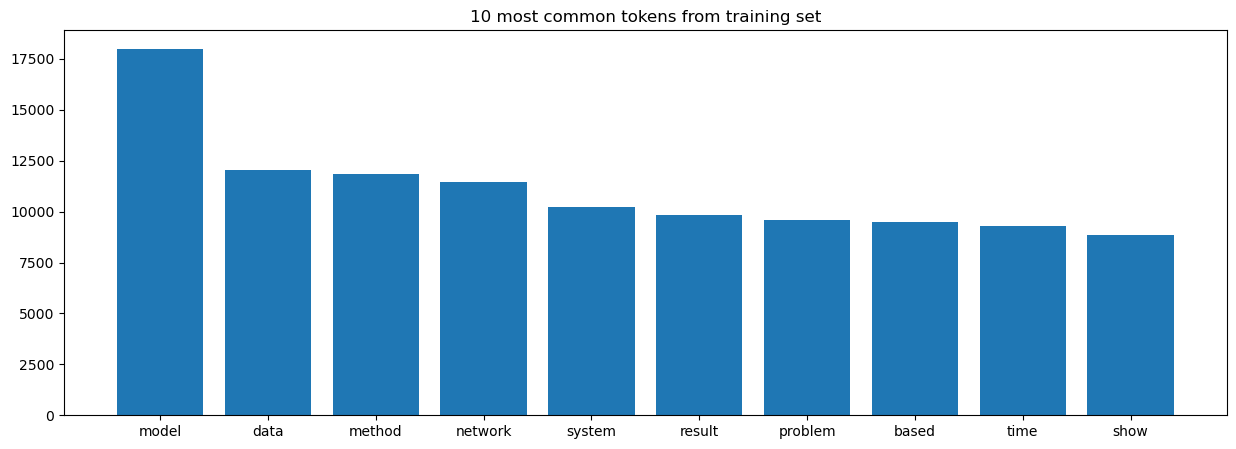

In [24]:
train_top10 = get_top_n(train_df['bow'], n=10)

print(train_top10)

_ = plt.figure(figsize=(15,5))
_ = plt.title("10 most common tokens from training set")
_ = plt.bar(train_top10.keys(), train_top10.values())

{'model': 7793, 'data': 5051, 'network': 4975, 'method': 4800, 'system': 4410, 'result': 4180, 'based': 3998, 'problem': 3957, 'time': 3894, 'using': 3811}


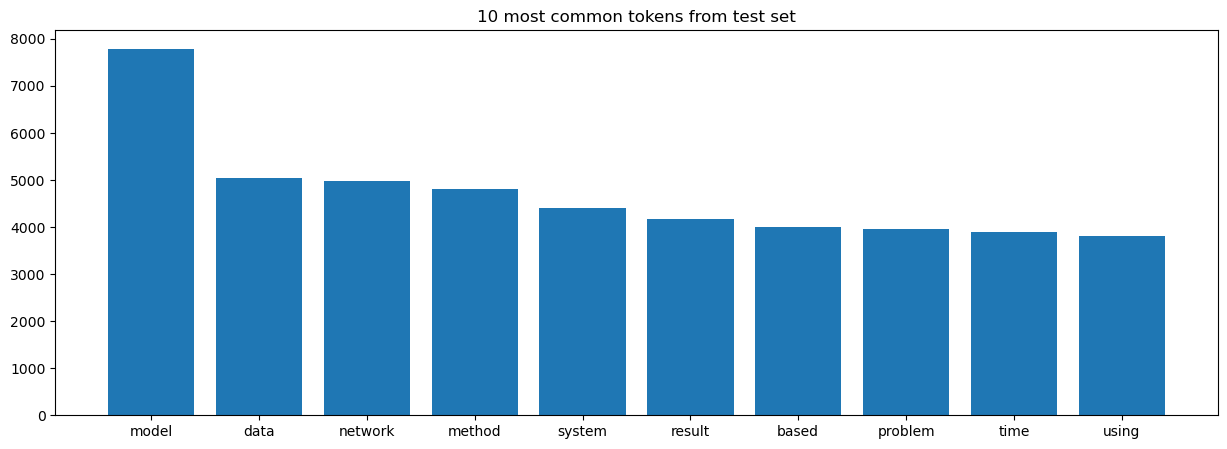

In [25]:
test_top10 = get_top_n(test_df['bow'], n=10)

print(test_top10)

_ = plt.figure(figsize=(15,5))
_ = plt.title("10 most common tokens from test set")
_ = plt.bar(test_top10.keys(), test_top10.values())

Computer Science: {'model': 8485, 'network': 8420, 'data': 6830, 'method': 6338, 'algorithm': 6219}
Physics: {'model': 4512, 'system': 3514, 'field': 3054, 'time': 2866, 'two': 2743}
Mathematics: {'problem': 2935, 'result': 2762, 'function': 2638, 'model': 2466, 'space': 2221}
Statistics: {'model': 7483, 'data': 5888, 'learning': 5113, 'method': 5107, 'network': 4771}
Quantitative Biology: {'model': 811, 'network': 761, 'data': 464, 'method': 392, 'cell': 364}
Quantitative Finance: {'model': 459, 'market': 285, 'price': 218, 'time': 187, 'risk': 158}


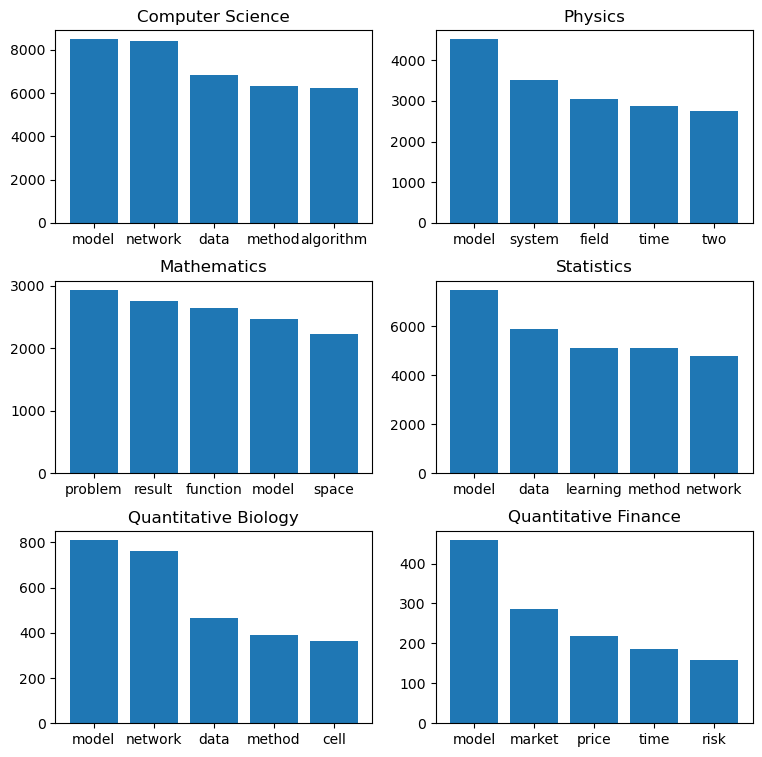

In [55]:
label_top5 = []
for label in labels:
    top5 = get_top_n(train_df[train_df[label] == 1]['bow'], n=5)
    label_top5.append(top5)
    print("{}: {}".format(label, top5))

fig, axs = plt.subplots(3, 2, figsize=(9,9), gridspec_kw={'hspace':0.3})
# TODO: Can probably clean this up more if you want?

_ = axs[0, 0].set_title(labels[0])
_ = axs[0, 0].bar(label_top5[0].keys(), label_top5[0].values())

_ = axs[0, 1].set_title(labels[1])
_ = axs[0, 1].bar(label_top5[1].keys(), label_top5[1].values())

_ = axs[1, 0].set_title(labels[2])
_ = axs[1, 0].bar(label_top5[2].keys(), label_top5[2].values())

_ = axs[1, 1].set_title(labels[3])
_ = axs[1, 1].bar(label_top5[3].keys(), label_top5[3].values())

_ = axs[2, 0].set_title(labels[4])
_ = axs[2, 0].bar(label_top5[4].keys(), label_top5[4].values())

_ = axs[2, 1].set_title(labels[5])
_ = axs[2, 1].bar(label_top5[5].keys(), label_top5[5].values())